#  King County House Price Prediction

# Assignment 1

## Abstract

King County is a county located in the U.S. state of Washington, which includes Seattle from King County House. This project addresses the issues concerning the “price of house” with respect to the housing department of King county. The specific objective of this Study was to investigate the pricing of houses employed in a different locale. This study analyzed house prices at King County, USA. Our goal was to compare prices of house with different location, different grades, different area etc. This project illustrates different approaches to predict house prices using machine learning tools and forecasting algorithms to uncover what really influences the value of a house and achieve the high degree of accuracy in our model. The original dataset can be found in the Kaggle website. This dataset will allow us to learn more about the Housing market and to explore more deeply the most popular machine learning techniques.

## Approach

Algorithms used.

* For Part A:
    * Bagging Algo : Random Forest Classifier
    * Boosting Algo : XGBoost Classifier
* For Part B:
    * Logistic Regression
* For Part C:
    * Bagging Algo : Random Forest Regressor
    * Boosting Algo : XGBoost Regressor
* For Part D:
    * Linear Regression and Lasso Regression with hyperparameter tuning
* For Part E:
    * Implemented Support vector machine

## Dataset
* King County House Price prediction [https://www.kaggle.com/harlfoxem/housesalesprediction/home](https://www.kaggle.com/harlfoxem/housesalesprediction/home)  This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.  
* In order to perform classification tasks, I have converted the price quantitative variable to a binary classification variable with HIGH price as 1 and LOW price as -1(For logistic regression I am taking LOW as 0)

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas import Series
%matplotlib inline

In [51]:
features = pd.read_csv('king_county_cleansed.csv')

- The function 'read_csv()' is belongs to 'pandas' library.
- It reads CSV file separated by delimiter ','.
- The data in .csv format has been imported from kaggle kernel.

In [52]:
features.head()

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,...,grade#10,grade#11,grade#12,grade#13,zipcode#98004,zipcode#98102,zipcode#98109,zipcode#98112,zipcode#98039,zipcode#98040
0,16768,437500,3,2.25,1970,35100,0,1970,0,1977,...,0,0,0,0,0,0,0,0,0,0
1,9596,790000,3,2.50,2600,4750,0,1700,900,1951,...,0,0,0,0,0,0,0,0,0,0
2,9587,675000,5,2.50,2820,67518,0,2820,0,1979,...,0,0,0,0,0,0,0,0,0,0
3,20602,555000,4,2.50,3310,6500,0,3310,0,2012,...,0,0,0,0,0,0,0,0,0,0
4,11577,440000,4,2.25,2160,8119,0,1080,1080,1966,...,0,0,0,0,0,0,0,0,0,0


- ".head()" function of pandas library returns first five observations of the dataset
- Similarly ".tail()" returns last five observations

In [54]:
features.shape

(21613, 51)

- '.shape' is used find out the total number of rows and columns in the dataset
- This dataset comprises of 21613 observations and 51 characteristics

In [56]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 51 columns):
index               21613 non-null int64
price               21613 non-null int64
bedrooms            21613 non-null int64
bathrooms           21613 non-null float64
sqft_living         21613 non-null int64
sqft_lot            21613 non-null int64
waterfront          21613 non-null int64
sqft_above          21613 non-null int64
sqft_basement       21613 non-null int64
yr_built            21613 non-null int64
yr_renovated        21613 non-null int64
lat                 21613 non-null float64
long                21613 non-null float64
sqft_living15       21613 non-null int64
sqft_lot15          21613 non-null int64
basement_present    21613 non-null int64
renovated           21613 non-null int64
floors#1.0          21613 non-null int64
floors#1.5          21613 non-null int64
floors#2.0          21613 non-null int64
floors#2.5          21613 non-null int64
floors#3.0          2161

- Data has only float and integer values
- No variable column has null/missing values

In [58]:
features.describe()

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,...,grade#10,grade#11,grade#12,grade#13,zipcode#98004,zipcode#98102,zipcode#98109,zipcode#98112,zipcode#98039,zipcode#98040
count,21613.00000,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,0.007542,1788.390691,291.509045,1971.005136,...,0.052468,0.018461,0.004164,0.000601,0.014667,0.004858,0.005043,0.012446,0.002313,0.013048
std,6239.28002,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.086517,828.090978,442.575043,29.373411,...,0.222975,0.134615,0.064397,0.024518,0.120219,0.069533,0.070838,0.110869,0.048043,0.113482
min,0.00000,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,0.000000,290.000000,0.000000,1900.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5403.00000,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,0.000000,1190.000000,0.000000,1951.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10806.00000,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,0.000000,1560.000000,0.000000,1975.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16209.00000,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,0.000000,2210.000000,560.000000,1997.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,21612.00000,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,1.000000,9410.000000,4820.000000,2015.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- The describe() function in pandas helps in getting various summary statistics
- This function returns the count, mean, standard deviation, minimum and maximum values, as well as lower, 50 and upper percentiles. By default the lower percentile is 25 and the upper percentile is 75. The 50 percentile is the same as the median
- There is notably a large difference between 75th %tile and max values of predictors "bedrooms", "sqft_living", "sqft_basement"
- Thus the above observation shows that there are extreme values-Outliers in our data set

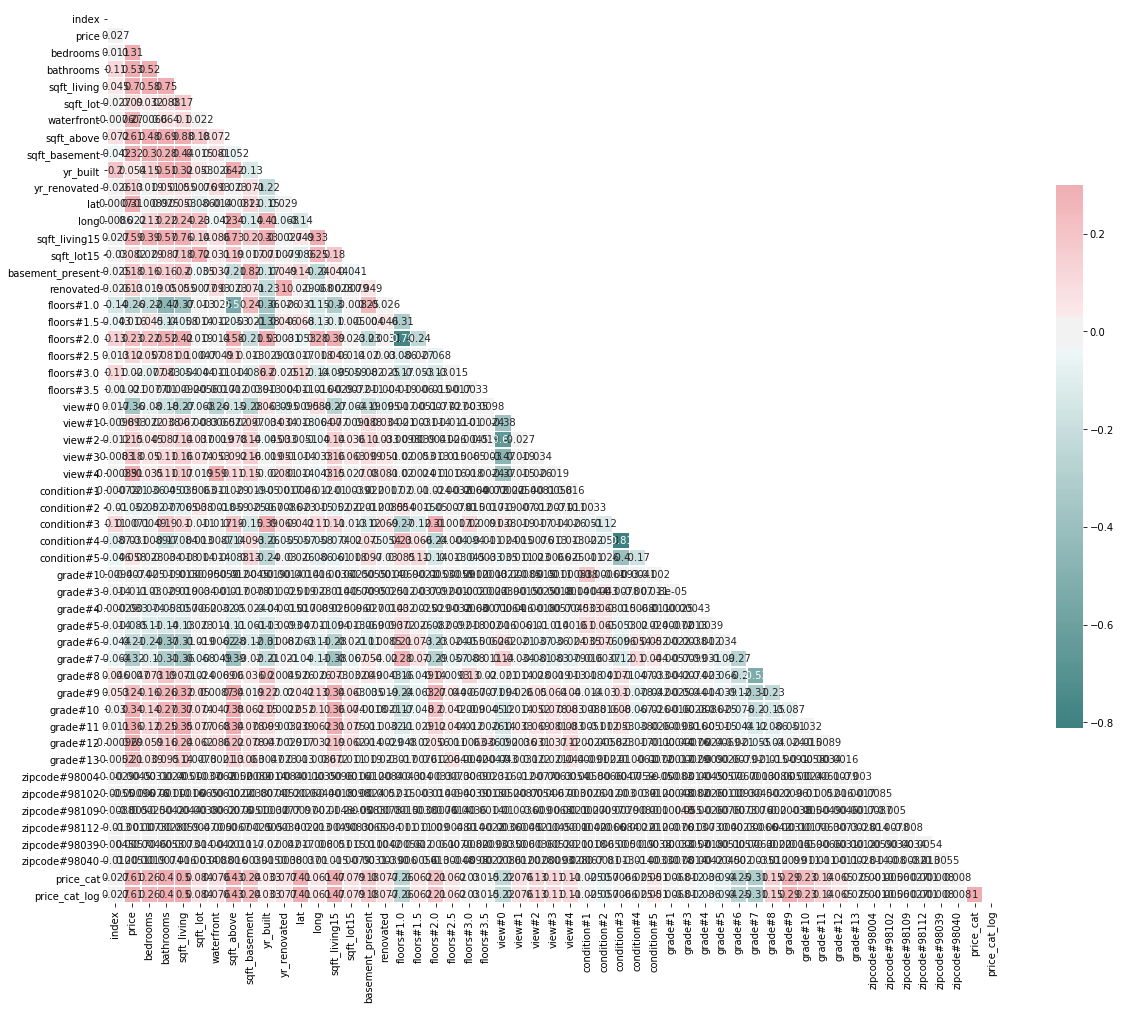

In [176]:
corr = features.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(190, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

- Pandas '.corr()' is used to find the pairwise correlation of all columns in the dataframe. Any na values are automatically excluded
- The zeros_like() function is used to get an array of zeros with the same shape and type as a given array
- To visualize the correlation matrix I've used heatmap in seaborn package
- Dark shades represent positive correlation while lighter shades represents negative correlation
- Here we can infer that 'price' has strong correlation with 'bedrooms' and 'condition#3' has strong negative correlation with 'condition#4'

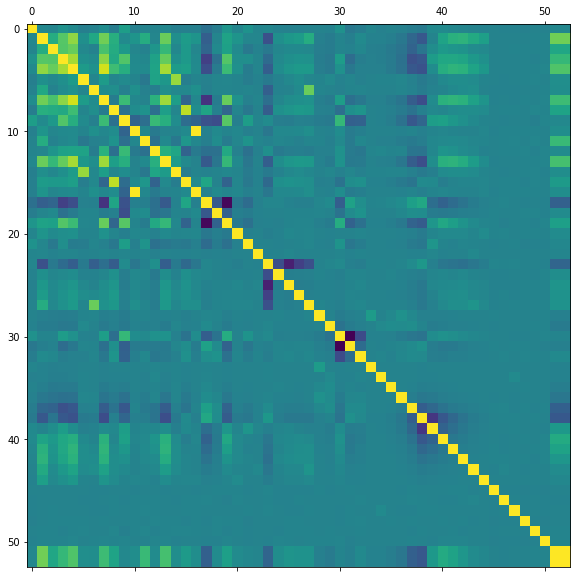

In [156]:
fig, ax = plt.subplots(figsize=(20,10))
ax.matshow(features.corr())

#plt.matshow(features.corr())
plt.show()

In [63]:
median_price = features.loc[:,"price"].median()
print(median_price)

450000.0


The median prices of the houses is 450000.0

Adding column to dataframe for holding categorical price value : HIGH/LOW

All values < median are LOW and Values >= median are HIGH

In [64]:
features['price_cat'] = features['price'].apply(lambda x: 1 if x > median_price else -1)

In [65]:
features[['price','price_cat']].head(10)

,price,price_cat
0,437500,-1
1,790000,1
2,675000,1
3,555000,1
4,440000,-1
5,295000,-1
6,470000,1
7,550000,1
8,313000,-1
9,626000,1


In [66]:
features.head(5)

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,...,grade#11,grade#12,grade#13,zipcode#98004,zipcode#98102,zipcode#98109,zipcode#98112,zipcode#98039,zipcode#98040,price_cat
0,16768,437500,3,2.25,1970,35100,0,1970,0,1977,...,0,0,0,0,0,0,0,0,0,-1
1,9596,790000,3,2.50,2600,4750,0,1700,900,1951,...,0,0,0,0,0,0,0,0,0,1
2,9587,675000,5,2.50,2820,67518,0,2820,0,1979,...,0,0,0,0,0,0,0,0,0,1
3,20602,555000,4,2.50,3310,6500,0,3310,0,2012,...,0,0,0,0,0,0,0,0,0,1
4,11577,440000,4,2.25,2160,8119,0,1080,1080,1966,...,0,0,0,0,0,0,0,0,0,-1


## Part A

* Bagging Algo : Random Forest Classifier
    - Random Forest is one of the most popular and most powerful machine learning algorithms. It is a type of ensemble machine learning algorithm called Bootstrap Aggregation or bagging. An ensemble method is a technique that combines the predictions from multiple machine learning algorithms together to make more accurate predictions than any individual model.
    
* Boosting Algo : XGBoost Classifier
    - Boosting is an ensemble method for improving the model predictions of any given learning algorithm. The idea of boosting is to train weak learners sequentially, each trying to correct its predecessor. XGBoost stands for eXtreme Gradient Boosting. XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.
    
Compare at least one bagging based tree algorithm (e.g. Random Forest) with a boosting based tree algorithm on a classification problem.

* Which hyper-parameters are important?
   - n_estimators(number of trees to be used in the forest), max_features(maximum number of features to consider while looking for a split)

## Random Forest Classifier


In [67]:
from sklearn.model_selection import train_test_split

In [68]:
features.columns

Index(['index', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'grade#10', 'grade#11', 'grade#12',
       'grade#13', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040', 'price_cat'],
      dtype='object')

In [69]:
X_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'grade#10', 'grade#11', 'grade#12',
       'grade#13', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040']

X=features[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'grade#10', 'grade#11', 'grade#12',
       'grade#13', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040']]  # Features

y=features['price_cat']  # Labels
       
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [73]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)


In [141]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9134793337446021


The accuracy of the model is 91.34%

In [75]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [76]:
feature_imp = pd.Series(clf.feature_importances_,index=X_features).sort_values(ascending=False)
feature_imp

lat                 2.766405e-01
sqft_living         1.177461e-01
sqft_living15       9.028481e-02
sqft_above          7.405595e-02
long                5.287268e-02
sqft_lot15          5.063779e-02
yr_built            4.970771e-02
sqft_lot            4.620639e-02
bathrooms           3.971383e-02
grade#7             2.749803e-02
sqft_basement       2.677644e-02
grade#9             2.202011e-02
bedrooms            1.644192e-02
grade#8             1.487183e-02
grade#6             1.451925e-02
view#0              9.768845e-03
floors#1.0          8.963668e-03
basement_present    8.365786e-03
grade#10            8.141681e-03
condition#3         6.520489e-03
floors#2.0          6.091359e-03
condition#4         4.407616e-03
floors#1.5          3.782010e-03
condition#5         3.436493e-03
yr_renovated        3.159995e-03
view#2              1.970560e-03
renovated           1.783444e-03
zipcode#98004       1.637468e-03
view#4              1.466524e-03
view#3              1.426240e-03
floors#3.0

In [77]:
top_features = feature_imp.head(10)
top_features

lat              0.276640
sqft_living      0.117746
sqft_living15    0.090285
sqft_above       0.074056
long             0.052873
sqft_lot15       0.050638
yr_built         0.049708
sqft_lot         0.046206
bathrooms        0.039714
grade#7          0.027498
dtype: float64

No handles with labels found to put in legend.


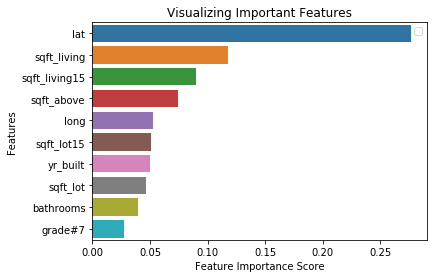

In [78]:
# Creating a bar plot
sns.barplot(x=top_features, y=top_features.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [79]:
from pprint import pprint

In [80]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(clf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


According to the documentation, the most important settings are the number of trees in the forest (n_estimators) and the number of features considered for splitting at each leaf node (max_features)

We will try adjusting the following set of hyperparameters:



### Finding important hyper-parameters

The important parameters for a Random Forest Classfier are as follows:



### We will use RandomSearchCV and GridSearchCV to find the best values for the same

In [81]:
from sklearn.model_selection import RandomizedSearchCV

In [82]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 10, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4]
# Method of selecting samples for training each tree
#bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
pprint(random_grid)

{'max_depth': [2, 4, 6, 8, 10, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [2, 4],
 'min_samples_split': [5, 10],
 'n_estimators': [10, 57, 105, 152, 200]}


In [83]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
clf_base = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
clf_random = RandomizedSearchCV(estimator = clf_base, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
clf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   36.9s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.2min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [10, 57, 105, 152, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4, 6, 8, 10, None], 'min_samples_split': [5, 10], 'min_samples_leaf': [2, 4]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [84]:
clf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None}

### Evaluate Random Search

In [85]:
## Common Classification algorithm evaluator. It returns the roc_auc
from sklearn.metrics import roc_curve, auc
def evaluate(model, X_train,y_train, X_test, y_test):
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    #print(roc)
    return roc_auc

In [86]:
base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)

In [87]:
best_random = clf_random.best_estimator_

In [88]:
print('ROC for base model : ' + str(evaluate(base_model,X_train,y_train, X_test, y_test)))
print('ROC for best model : ' + str(evaluate(best_random,X_train,y_train, X_test, y_test)))

ROC for base model : 0.8879333653216347
ROC for best model : 0.901105310058036


### Grid Search with Cross Validation

In [89]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_features': ['auto'],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [3,5,7],
    'n_estimators': [100, 200, 2000]
}
# Create a based model
clf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [90]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  3.9min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'bootstrap': [True], 'max_features': ['auto'], 'min_samples_leaf': [1, 2, 3], 'min_samples_split': [3, 5, 7], 'n_estimators': [100, 200, 2000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [91]:
grid_search.best_params_

{'bootstrap': True,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 2000}

In [92]:
best_grid = grid_search.best_estimator_

In [93]:
print('ROC for best grid search model : ' + str(evaluate(best_grid,X_train,y_train, X_test, y_test)))

ROC for best grid search model : 0.9031544654145532


### Now lets implement XGBoost (eXtreme Gradient Boosting) 

I’ll consider only tree booster here because it always outperforms the linear booster and thus the later is rarely used.

In [95]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [96]:
# fit model on training data
xgBoostClassifierModel = XGBClassifier()
xgBoostClassifierModel.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [97]:
# make predictions for test data
y_pred = xgBoostClassifierModel.predict(X_test)
predictions = [round(value) for value in y_pred]

C:\Users\Preetam Jain\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [98]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 90.27%


In [99]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

Best: -0.213569 using {'n_estimators': 350}
-0.258151 (0.009201) with: {'n_estimators': 50}
-0.231614 (0.008189) with: {'n_estimators': 100}
-0.222398 (0.007973) with: {'n_estimators': 150}
-0.218290 (0.008038) with: {'n_estimators': 200}
-0.215791 (0.008139) with: {'n_estimators': 250}
-0.214457 (0.008072) with: {'n_estimators': 300}
-0.213569 (0.008361) with: {'n_estimators': 350}


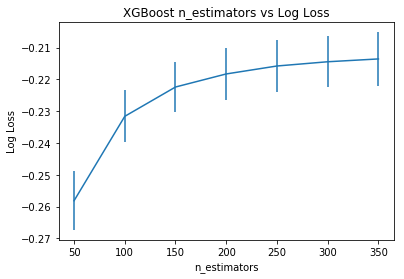

In [100]:
model = XGBClassifier()
n_estimators = range(50, 400, 50)
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot
plt.errorbar(n_estimators, means, yerr=stds)
plt.title("XGBoost n_estimators vs Log Loss")
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')
plt.savefig('n_estimators.png')

We can see that the cross validation log loss scores are negative. This is because the scikit-learn cross validation framework inverted them. The reason is that internally, the framework requires that all metrics that are being optimized are to be maximized, whereas log loss is a minimization metric. It can easily be made maximizing by inverting the scores.

The best number of trees was n_estimators=350 resulting in a log loss of -0.213537, but really not a significant difference from n_estimators=200. In fact, there is not a large relative difference in the number of trees between 100 and 350 if we plot the results.

## Tune the Size of Decision Trees in XGBoost

In gradient boosting, we can control the size of decision trees, also called the number of layers or the depth.

Shallow trees are expected to have poor performance because they capture few details of the problem and are generally referred to as weak learners. Deeper trees generally capture too many details of the problem and overfit the training dataset, limiting the ability to make good predictions on new data.

Generally, boosting algorithms are configured with weak learners, decision trees with few layers, sometimes as simple as just a root node, also called a decision stump rather than a decision tree.

The maximum depth can be specified in the XGBClassifier and XGBRegressor wrapper classes for XGBoost in the max_depth parameter. This parameter takes an integer value and defaults to a value of 3.

In [101]:
model = XGBClassifier()
max_depth = range(1, 11, 2)
print(max_depth)
param_grid = dict(max_depth=max_depth)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))


range(1, 11, 2)
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   41.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.1min finished


Best: -0.209321 using {'max_depth': 7}
-0.330972 (0.008083) with: {'max_depth': 1}
-0.231614 (0.008189) with: {'max_depth': 3}
-0.213779 (0.009496) with: {'max_depth': 5}
-0.209321 (0.009710) with: {'max_depth': 7}
-0.210487 (0.010089) with: {'max_depth': 9}


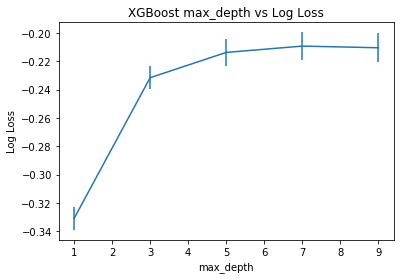

In [102]:
# plot
plt.errorbar(max_depth, means, yerr=stds)
plt.title("XGBoost max_depth vs Log Loss")
plt.xlabel('max_depth')
plt.ylabel('Log Loss')
plt.savefig('max_depth.png')

Reviewing the plot of log loss scores, we can see a marked jump from max_depth=1 to max_depth=3 then pretty even performance for the rest the values of max_depth.

Although the best score was observed for max_depth=5, it is interesting to note that there was practically little difference between using max_depth=3 or max_depth=7.

This suggests a point of diminishing returns in max_depth on a problem that you can tease out using grid search. A graph of max_depth values is plotted against (inverted) logarithmic loss below.

### Tune The Number of Trees and Max Depth in XGBoost

There is a relationship between the number of trees in the model and the depth of each tree.

We would expect that deeper trees would result in fewer trees being required in the model, and the inverse where simpler trees (such as decision stumps) require many more trees to achieve similar results.

We can investigate this relationship by evaluating a grid of n_estimators and max_depth configuration values. To avoid the evaluation taking too long, we will limit the total number of configuration values evaluated. Parameters were chosen to tease out the relationship rather than optimize the model.

We will create a grid of 4 different n_estimators values (350, 300, 250, 400) and 4 different max_depth values (6, 7, 8, 9) and each combination will be evaluated using 10-fold cross validation. A total of 4*4*10 or 160 models will be trained and evaluated.



In [103]:
# grid search
model = XGBClassifier()
n_estimators = [350, 300, 250, 400]
max_depth = [6, 7, 8, 9]
print(max_depth)
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))


[6, 7, 8, 9]
Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed: 12.6min finished


Best: -0.210159 using {'max_depth': 6, 'n_estimators': 250}
-0.214110 (0.012436) with: {'max_depth': 6, 'n_estimators': 350}
-0.211791 (0.011659) with: {'max_depth': 6, 'n_estimators': 300}
-0.210159 (0.010987) with: {'max_depth': 6, 'n_estimators': 250}
-0.215910 (0.013216) with: {'max_depth': 6, 'n_estimators': 400}
-0.221621 (0.013237) with: {'max_depth': 7, 'n_estimators': 350}
-0.218328 (0.012460) with: {'max_depth': 7, 'n_estimators': 300}
-0.214709 (0.011613) with: {'max_depth': 7, 'n_estimators': 250}
-0.224784 (0.013337) with: {'max_depth': 7, 'n_estimators': 400}
-0.228363 (0.013066) with: {'max_depth': 8, 'n_estimators': 350}
-0.223852 (0.012645) with: {'max_depth': 8, 'n_estimators': 300}
-0.219544 (0.011877) with: {'max_depth': 8, 'n_estimators': 250}
-0.233052 (0.013689) with: {'max_depth': 8, 'n_estimators': 400}
-0.235692 (0.014805) with: {'max_depth': 9, 'n_estimators': 350}
-0.230308 (0.014324) with: {'max_depth': 9, 'n_estimators': 300}
-0.224583 (0.013422) with: {'m

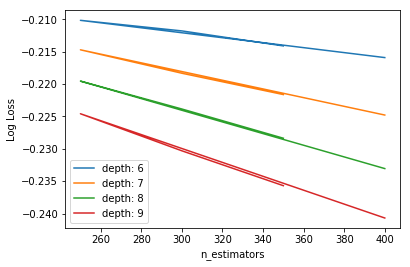

In [104]:
# plot results
scores = np.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    plt.plot(n_estimators, scores[i], label='depth: ' + str(value))
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')
plt.savefig('n_estimators_vs_max_depth.png')

We can see that the best result was achieved with a n_estimators=250 and max_depth=6, similar to the best values found from the previous two rounds of standalone parameter tuning (n_estimators=250, max_depth=5).

We can plot the relationship between each series of max_depth values for a given n_estimators.

Fewer boosted trees are required with increased tree depth.

Further, we would expect the increase complexity provided by deeper individual trees to result in greater overfitting of the training data which would be exacerbated by having more trees, in turn resulting in a lower cross validation score. We don’t see this here as our trees are not that deep nor do we have too many. Exploring this expectation  is left as an exercise you could explore yourself.

## Creating the model with the best values for Hyper parameters


In [105]:
model = XGBClassifier(max_depth=6, n_estimators=250)

In [106]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=250,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


In [107]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

C:\Users\Preetam Jain\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [108]:
print('ROC for the XGBoost model is: ' + str(evaluate(model, X_train,y_train, X_test, y_test)))

ROC for the XGBoost model is: 0.9135137245045621


C:\Users\Preetam Jain\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## Thus we got a higher ROC for XGBoost model than the bagging models tried earlier

## Classification with Logistic Regression

Compare logistic regression with the based tree algorithms in Part A on the same data. Answer the following questions for logistic regression:

* Which independent variables are important?
* Is there multi-colinearity?
* How does it compare to the the models in Part A?

We need to develop a Nominal Logistic Regression model which will predict whether the house price is HIGH(1) or LOW(-1)

In [109]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [110]:
features['price_cat_log'] = features['price'].apply(lambda x: 1 if x > median_price else 0)

In [111]:
features.columns

Index(['index', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'grade#10', 'grade#11', 'grade#12',
       'grade#13', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040', 'price_cat',
       'price_cat_log'],
      dtype='object')

In [112]:
price_cat_log=features['price_cat_log']
y_log=price_cat_log

In [113]:
X_train_log,X_test_log,y_train_log,y_test_log=train_test_split(features[['bedrooms', 'sqft_living', 'waterfront', 'sqft_basement', 'yr_built', 'bathrooms']]
                                                               ,y_log,test_size=0.3,random_state=0)

In [114]:
logreg=LogisticRegression().fit(X_train_log,y_train_log)
logreg
print("Training set score: {:.3f}".format(logreg.score(X_train_log,y_train_log)))
print("Test set score: {:.3f}".format(logreg.score(X_test_log,y_test_log)))

Training set score: 0.732
Test set score: 0.731


In [115]:
logit_model=sm.Logit(y_train_log,X_train_log)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.522835
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          price_cat_log   No. Observations:                15129
Model:                          Logit   Df Residuals:                    15123
Method:                           MLE   Df Model:                            5
Date:                Wed, 30 Jan 2019   Pseudo R-squ.:                  0.2457
Time:                        16:05:53   Log-Likelihood:                -7910.0
converged:                       True   LL-Null:                       -10486.
                                        LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms         -0.3118      0.028    -10.959      0.000      -0.368      -0.256
sqft_living       0.

### Looking at the z scores, we know that, sqft_living is the most significant followed by yr_built and then the rest.

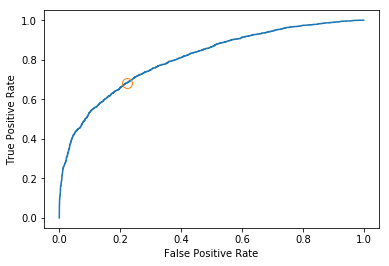

In [116]:
from sklearn.metrics import roc_curve
falsepos,truepos,thresholds=roc_curve(y_test_log,logreg.decision_function(X_test_log))

plt.plot(falsepos,truepos,label="ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

cutoff=np.argmin(np.abs(thresholds))
plt.plot(falsepos[cutoff],truepos[cutoff],'o',markersize=10,label="cutoff",fillstyle="none")
plt.show()

In [117]:
from sklearn import metrics
metrics.auc(falsepos, truepos)

0.8078695178147917

## As compared to Models in Part A, the accuracy of the Logistic Regression model is less. 

## Regression with Trees 
Compare at least one bagging based tree algorithm (e.g. Random Forest) with a boosting based tree algorithm on a regression problem.
Answer the following questions for each supervised learner:

* Which hyper-parameters are important?    
* What hyper-parameter values work best?   
* Which supervised learner works best on the test data?  


### Random Forest based Regression

To look at the available hyperparameters, we can create a random forest and examine the default values.

In [118]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


* estimators = number of trees in the foreset
* max_features = max number of features considered for splitting a node
* max_depth = max number of levels in each decision tree
* min_samples_split = min number of data points placed in a node before the node is split
* min_samples_leaf = min number of data points allowed in a leaf node
* bootstrap = method for sampling data points (with or without replacement)

In [119]:
X_features_reg = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'grade#10', 'grade#11', 'grade#12',
       'grade#13', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040']

X_reg=features[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'grade#10', 'grade#11', 'grade#12',
       'grade#13', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040']]  # Features

y_reg=features['price']  # Labels
       
# Split dataset into training set and test set
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3) # 70% training and 30% test

### Random Search Cross Validation in Scikit-Learn

To use RandomizedSearchCV, we first need to create a parameter grid to sample from during fitting:

In [120]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 10, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4]
# Method of selecting samples for training each tree
#bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
pprint(random_grid)

{'max_depth': [2, 4, 6, 8, 10, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [2, 4],
 'min_samples_split': [5, 10],
 'n_estimators': [10, 57, 105, 152, 200]}


In [121]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_reg, y_train_reg)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   23.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.1min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [10, 57, 105, 152, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4, 6, 8, 10, None], 'min_samples_split': [5, 10], 'min_samples_leaf': [2, 4]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [122]:
def evaluate_reg(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train_reg, y_train_reg)
base_accuracy = evaluate_reg(base_model, X_test_reg, y_test_reg)

Model Performance
Average Error: 74113.2599 degrees.
Accuracy = 85.96%.


In [123]:
rf_random.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [124]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate_reg(best_random, X_test_reg, y_test_reg)

Model Performance
Average Error: 70946.1485 degrees.
Accuracy = 86.65%.


### Grid Search with Cross Validation

In [125]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [None],
    'max_features': [2, 3],
    'min_samples_leaf': [2,3,4],
    'min_samples_split': [3,5,7],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [126]:
# Fit the grid search to the data
grid_search.fit(X_train_reg, y_train_reg)
grid_search.best_params_

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   27.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:  7.4min finished


{'bootstrap': False,
 'max_depth': None,
 'max_features': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 300}

In [127]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 300}

In [128]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate_reg(best_grid, X_test_reg, y_test_reg)

Model Performance
Average Error: 90480.8553 degrees.
Accuracy = 82.17%.


## Now lets implement XGBoost (eXtreme Gradient Boosting)

In [129]:
from xgboost import XGBRegressor

In [130]:
base_model = XGBRegressor()
base_model.fit(X_train_reg, y_train_reg)
base_accuracy = evaluate_reg(base_model, X_test_reg, y_test_reg)

Model Performance
Average Error: 81279.0394 degrees.
Accuracy = 84.37%.


In [131]:
base_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [132]:
model = XGBRegressor()
n_estimators = range(50, 400, 50)
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.707443 using {'n_estimators': 350}
0.677186 (0.013362) with: {'n_estimators': 50}
0.690263 (0.012675) with: {'n_estimators': 100}
0.696450 (0.012939) with: {'n_estimators': 150}
0.700737 (0.012500) with: {'n_estimators': 200}
0.703788 (0.012682) with: {'n_estimators': 250}
0.705890 (0.012724) with: {'n_estimators': 300}
0.707443 (0.012442) with: {'n_estimators': 350}


In [133]:
model = XGBRegressor()
max_depth = range(1, 11, 2)
print(max_depth)
param_grid = dict(max_depth=max_depth)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train_reg, y_train_reg)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))


range(1, 11, 2)
Fitting 10 folds for each of 5 candidates, totalling 50 fits


C:\Users\Preetam Jain\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   36.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.0min finished


Best: 0.853090 using {'max_depth': 5}
0.658624 (0.043430) with: {'max_depth': 1}
0.816402 (0.029745) with: {'max_depth': 3}
0.853090 (0.020744) with: {'max_depth': 5}
0.852582 (0.028873) with: {'max_depth': 7}
0.851197 (0.031922) with: {'max_depth': 9}


In [134]:
# grid search
model = XGBRegressor()
n_estimators = [300,350,400]
max_depth = [4,5,6,7]
print(max_depth)
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

[4, 5, 6, 7]
Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  7.5min finished


Best: 0.727827 using {'max_depth': 6, 'n_estimators': 300}
0.720502 (0.011588) with: {'max_depth': 4, 'n_estimators': 300}
0.721083 (0.011849) with: {'max_depth': 4, 'n_estimators': 350}
0.721288 (0.011943) with: {'max_depth': 4, 'n_estimators': 400}
0.725759 (0.012426) with: {'max_depth': 5, 'n_estimators': 300}
0.725475 (0.012334) with: {'max_depth': 5, 'n_estimators': 350}
0.725063 (0.012177) with: {'max_depth': 5, 'n_estimators': 400}
0.727827 (0.012328) with: {'max_depth': 6, 'n_estimators': 300}
0.726252 (0.012746) with: {'max_depth': 6, 'n_estimators': 350}
0.724972 (0.012635) with: {'max_depth': 6, 'n_estimators': 400}
0.727486 (0.014168) with: {'max_depth': 7, 'n_estimators': 300}
0.726560 (0.014344) with: {'max_depth': 7, 'n_estimators': 350}
0.725693 (0.014417) with: {'max_depth': 7, 'n_estimators': 400}


In [135]:
best_XGBoost = grid_result.best_estimator_
best_XGBoost

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [136]:
best_XGBoost.fit(X_train_reg, y_train_reg)
best_accuracy = evaluate_reg(best_XGBoost, X_test_reg, y_test_reg)

Model Performance
Average Error: 67078.5807 degrees.
Accuracy = 87.25%.


### XGBoost Algo provides better predictions than Random Forest for the regression problem. And both of them provide a lower RMSE than Linear Regression

#### Evaluating the regression models


In [137]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [138]:
#Random Forest best model
print('Random forest best model RMSE is : ' + str(round(sqrt(mean_squared_error(best_random.predict(X_test_reg), y_test_reg)),2)))

Random forest best model RMSE is : 130955.13


In [139]:
#XGBoost Best model
print('XGBoost best model RMSE is : ' + str(round(sqrt(mean_squared_error(best_XGBoost.predict(X_test_reg), y_test_reg)),2)))

XGBoost best model RMSE is : 123326.06


## Part D

### Linear Regression

Linear regression is used for finding linear relationship between target and one or more predictors.

In [142]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_reg, y_train_reg)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [143]:
accuracy = regressor.score(X_test_reg, y_test_reg)
"Accuracy: {}%".format(int(round(accuracy * 100)))

'Accuracy: 74%'

The accuracy of the model using linear regression is 74%

In [157]:
from sklearn.metrics import *

In [158]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [159]:
y_test_pred=regressor.predict(X_test_reg)
print("R2   :",r2_score(y_test_reg,y_test_pred))
print("MAE  :",mean_absolute_error(y_test_reg,y_test_pred))
print("RMSE :",np.sqrt(mean_squared_error(y_test_reg,y_test_pred)))
print("MAPE :",mean_absolute_percentage_error(y_test_reg,y_test_pred))

R2   : 0.7359258248854934
MAE  : 119424.7225351231
RMSE : 187556.44629186374
MAPE : 23.258211431417443


### Lasso Regression

In [160]:
from sklearn.linear_model import Lasso

In [161]:
lassoreg = Lasso(alpha=0.0001,normalize=True)
lassoreg.fit(X_train_reg,y_train_reg)
y_pred = lassoreg.predict(X_test_reg)

C:\Users\Preetam Jain\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [162]:
lassoreg.score(X_test_reg, y_test_reg)

0.734861643196584

### Lasso with Grid SearchCV

In [163]:
model = Lasso()
alpha = [25,10,4,2,1,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01]
param_grid = dict(alpha = alpha)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train_reg, y_train_reg)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 10 folds for each of 13 candidates, totalling 130 fits


C:\Users\Preetam Jain\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   44.6s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:  2.0min finished


Best: 0.665762 using {'alpha': 0.01}
0.665542 (0.057344) with: {'alpha': 25}
0.665658 (0.057461) with: {'alpha': 10}
0.665725 (0.057480) with: {'alpha': 4}
0.665746 (0.057487) with: {'alpha': 2}
0.665754 (0.057490) with: {'alpha': 1}
0.665756 (0.057490) with: {'alpha': 0.8}
0.665758 (0.057491) with: {'alpha': 0.5}
0.665760 (0.057492) with: {'alpha': 0.3}
0.665761 (0.057492) with: {'alpha': 0.2}
0.665761 (0.057493) with: {'alpha': 0.1}
0.665762 (0.057493) with: {'alpha': 0.05}
0.665762 (0.057493) with: {'alpha': 0.02}
0.665762 (0.057493) with: {'alpha': 0.01}


C:\Users\Preetam Jain\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [164]:
grid_search.best_params_

{'alpha': 0.01}

In [165]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate_reg(best_grid, X_test_reg, y_test_reg)

Model Performance
Average Error: 119723.4078 degrees.
Accuracy = 76.65%.


#### Here we can say that the Lasso With hyperparameter tuned performed best.

#### Which supervised learner works best on the test data?

- Lasso worked best with test data.

#### What hyper-parameter values work best?

- The value which affected change in the RMSE was aplha value

#### Which hyper-parameters are important?

- For Lasso, the best parameters were {'alpha': 0.01}

## Part E

### Another Supervised learning model Support Vector Machine

In [166]:
from sklearn.svm import SVC
X_features = ['bedrooms', 'sqft_living', 'waterfront', 'sqft_basement', 'yr_built', 'bathrooms']

X=features[X_features]  # Features

y=features['price_cat']  # Labels
       
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [167]:
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [168]:
y_pred = svclassifier.predict(X_test)

In [169]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print("Accuracy:",metrics.accuracy_score(y_pred,y_test))

[[2407  817]
 [ 934 2326]]
             precision    recall  f1-score   support

         -1       0.72      0.75      0.73      3224
          1       0.74      0.71      0.73      3260

avg / total       0.73      0.73      0.73      6484

Accuracy: 0.7299506477483035


In [170]:
# Look at parameters used
print('Parameters currently in use:\n')
pprint(svclassifier.get_params())

Parameters currently in use:

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


In [171]:
#With Hyper Parameters Tuning
#making the instance
model=SVC(kernel='linear')
#Hyper Parameters Set
params = {'C': [6,7,8,9,10]}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)

In [172]:
#Learning
model1.fit(X_train, y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)

Best Hyper Parameters:
 {'C': 6}


In [173]:
#Prediction
prediction=model1.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))

Accuracy: 0.7299506477483035
Confusion Metrix:
 [[2407  934]
 [ 817 2326]]


## Conclusion

This project was motivated by the need for research that could improve our understanding of how multiple factors influences the pricing in the housing industry. The unique contribution of this project is that we investigated the price at which houses are sold by housing industry and related to what factors they select prices for various houses and how to predict prices using the past data for future. Using Classification, the best algorithm was Random Forest Classifier with accuracy of 0.91. Using Regression, the best algorithm was Lasso with GridSearchCV with RMSE of around 119723

## Contributions

In above analysis:
- 70% of code and data are given by professor
- 15% of resource is from web and citations are given below
- 15% of explanation, analysis and code is done by me

## Citations

- Random forest Classifer : https://www.datacamp.com/community/tutorials/random-forests-classifier-python
- Random Forest Regression : https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
- XGBoost Classifier & XGBoost Regression :
  - https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/
  - https://machinelearningmastery.com/tune-number-size-decision-trees-xgboost-python/
- Logistic Regression : http://www.michaeljgrogan.com/statsmodels-sklearn-linear-regression/
- Grid search for model tuning : https://towardsdatascience.com/grid-search-for-model-tuning-3319b259367e
- https://medium.com/greyatom/a-quick-guide-to-boosting-in-ml-acf7c1585cb5
- https://towardsdatascience.com/linear-regression-detailed-view-ea73175f6e86

## License

#### copyright 2019 PREETAM JAIN

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.  